# ## Classification - Churn Prediction

In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt

In [65]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#data.head().T

In [67]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
   df[c]= df[c].str.lower().str.replace(' ','_')

In [69]:
data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [71]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [73]:
df.totalcharges = df.totalcharges.fillna(0)

In [75]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [77]:
df.churn = (df.churn == 'yes').astype(int)

In [79]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int32
dtype: object

In [81]:
df['churn'].value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

# Setting up validation framework

In [84]:
whos

Variable               Type         Data/Info
---------------------------------------------
c                      str          churn
categorical_columns    list         n=18
data                   DataFrame    Shape: (7043, 21)
data_full_train        DataFrame    Shape: (5634, 21)
dataframe_columns      function     <function dataframe_colum<...>ns at 0x0000019759746D40>
dataframe_hash         function     <function dataframe_hash at 0x000001975BF5E200>
df                     DataFrame    Shape: (7043, 21)
df_test                DataFrame    Shape: (1409, 20)
df_train               DataFrame    Shape: (4225, 20)
df_val                 DataFrame    Shape: (1409, 20)
dtypes_str             function     <function dtypes_str at 0x000001975BF5DF80>
get_dataframes         function     <function get_dataframes at 0x0000019759747100>
getpass                module       <module 'getpass' from 'C<...>conda3\\Lib\\getpass.py'>
global_churn_rate      float64      0.0
hashlib                module

In [86]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [88]:
df_test['churn']

3381    0
6180    0
4829    0
3737    1
4249    0
       ..
2563    1
2028    0
2899    0
3474    0
5154    1
Name: churn, Length: 1409, dtype: int32

In [90]:
len(df_full_train), len(df_test), len(df_train),len(df_val)

(5634, 1409, 4225, 1409)

In [92]:
df_train = df_train.reset_index(drop= True)
df_test = df_test.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)

In [94]:
df_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int32
dtype: object

In [96]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [98]:
del df_train["churn"]
del df_test["churn"]
del df_val["churn"]

## EDA

In [101]:
df_full_train = df_full_train.reset_index(drop=True)


In [103]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [105]:
df_full_train.churn.value_counts(normalize= True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [107]:
#data_full_train['churn'] = (data_full_train['churn'] == 'yes').astype(int)
df_full_train['churn'].mean()


0.26996805111821087

In [109]:
df_full_train.seniorcitizen.value_counts()

seniorcitizen
0    4722
1     912
Name: count, dtype: int64

In [111]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [59]:
numerical = ['monthlycharges','tenure','monthlycharges']

In [115]:
categorical = ['gender','seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [117]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Important features: churn rates and risk ratio

### churn rate

In [119]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [121]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [123]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [125]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [127]:
churn_partner = df_full_train[data_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [129]:
churn_no_partner = df_full_train[data_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [131]:
global_churn - churn_partner

0.06493474245795922

In [133]:
global_churn - churn_no_partner

-0.05984095297455855

In [135]:
global_churn - churn_male

0.006754520462819769

In [137]:
global_churn - churn_female

-0.006855983216553063

#### churn rate < 0 means more likely to churn
#### if the churn rate > 0 means less likely to churn

# Risk ratio

In [139]:
churn_female / global_churn

1.0253955354648652

In [141]:
churn_partner/ global_churn

0.7594724924338315

In [159]:
churn_male/ global_churn

0.9749802969838747

In [161]:
churn_no_partner/ global_churn

1.2216593879412643

##### if the risk ration > 1 then more likely to churn
##### if the risk ratio < 1 then less likely to churn

In [151]:
df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean']/ global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [155]:
from IPython.display import display

In [167]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    #print(df_group)
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean']/ global_churn
    display(df_group)
    print()
    print()
    

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### Mutual information

In [170]:
from sklearn.metrics import mutual_info_score

In [176]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [178]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [180]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [182]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [184]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [186]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)
# Sorted the most important variables

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### correlation

In [188]:
df_full_train.tenure.max()

72

In [192]:
numerical = ['monthlycharges','tenure','monthlycharges']

In [194]:
df_full_train[numerical].corrwith(df_full_train.churn)

monthlycharges    0.196805
tenure           -0.351885
monthlycharges    0.196805
dtype: float64

#### Churn rate for tenure

In [197]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [199]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12) ].churn.mean()

0.3994413407821229

In [201]:
df_full_train[df_full_train.tenure >= 12].churn.mean()

0.17986881937436933

#### Hence churn rate is decreasing means -ve correlation.

### Churn rate for monthly charges

In [205]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [207]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50) ].churn.mean()

0.18340943683409436

In [209]:
df_full_train[df_full_train.monthlycharges >= 50].churn.mean()

0.3248223216635957

#### Hence the churn rate is increasing means the +ve correlation.

# One hot-encoding

In [212]:
from sklearn.feature_extraction import DictVectorizer

In [214]:
dicts = df_train[['gender','contract']].iloc[:10].to_dict(orient= 'records')

In [216]:
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

In [218]:
dv = DictVectorizer(sparse= False)

In [220]:
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [222]:
dv.transform(dicts)

array([[0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.]])

In [224]:
dicts = df_train[categorical + numerical].to_dict(orient= 'records')

C:\Users\ravis\AppData\Local\Temp\ipykernel_7000\1672777462.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dicts = df_train[categorical + numerical].to_dict(orient= 'records')


In [226]:
dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'monthlycharges': 115.5,
 'tenure': 72}

In [228]:
dv = DictVectorizer(sparse= False)

In [230]:
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [232]:
# Training data set
X_train= dv.transform(dicts)

In [234]:
X_train.shape

(4225, 44)

In [236]:
# Validation data set
dicts_val = df_val[categorical + numerical].to_dict(orient= 'records')
X_val = dv.transform(dicts_val)

C:\Users\ravis\AppData\Local\Temp\ipykernel_7000\1076282744.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dicts_val = df_val[categorical + numerical].to_dict(orient= 'records')


In [238]:
X_val.shape

(1409, 44)

### Logistic Regression

In [241]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))

In [243]:
z = np.linspace(-7, 7, 51)

In [245]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

In [247]:
import matplotlib.pyplot as plt

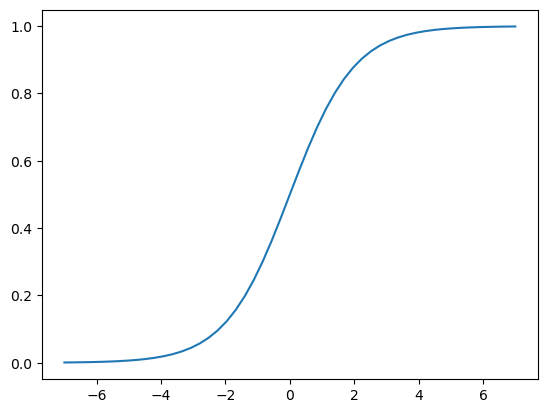

In [248]:
plt.plot(z, sigmoid(z))
plt.show()

In [251]:
# for regression;
def linear_regression(xi):
    result = w0
    for j in range(len(w)):
        result = result + xi[j]*w[j]
    return result 
    

In [253]:
# for classification.
def logistic_regression(xi):
    score = w0
    for j in range(len(w)):
        score = score + xi[j]*w[j]
        result =  sigmoid(score)
    return result
    

In [255]:
# Logistic regression using scikit-learn
from sklearn.linear_model import LogisticRegression

In [257]:
import warnings
warnings.filterwarnings('ignore')


In [259]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [261]:
model.intercept_[0]

-0.17665775990751045

In [263]:
model.coef_[0].round(3)

array([ 0.593, -0.068, -0.695, -0.057, -0.113,  0.018, -0.123, -0.065,
       -0.066, -0.104, -0.411,  0.364, -0.123,  0.007, -0.265,  0.084,
        0.01 ,  0.021, -0.123, -0.068,  0.184, -0.123, -0.231, -0.267,
        0.097, -0.15 , -0.02 , -0.126, -0.08 ,  0.048, -0.012,  0.084,
       -0.255,  0.201, -0.138, -0.123,  0.091, -0.105, -0.123,  0.058,
        0.14 , -0.123, -0.187, -0.037])

#### training data

In [275]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [277]:
y_pred = model.predict_proba(X_train)[:,1]

In [279]:
y_pred

array([0.0458376 , 0.70632768, 0.63052745, ..., 0.55106622, 0.03844483,
       0.70649696])

##### same with the validation data

In [282]:
y_pred_val = model.predict_proba(X_val)[:,1]

In [284]:
churn_decision = ( y_pred_val >= 0.5)

In [286]:
churn_decision

array([False, False, False, ..., False,  True,  True])

In [288]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 304, dtype: object

In [290]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [292]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [294]:
( y_val == churn_decision).mean()

0.8055358410220014

In [296]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred_val 
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [298]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [300]:
df_pred

,probability,prediction,actual,correct
0,0.009801,0,0,True
1,0.183323,0,0,True
2,0.191433,0,0,True
3,0.570205,1,1,True
4,0.179355,0,0,True
...,...,...,...,...
1404,0.361427,0,0,True
1405,0.051679,0,1,False
1406,0.151501,0,0,True
1407,0.814103,1,1,True


In [302]:
df_pred.correct.mean()

0.8055358410220014

## Model Interpretation

In [305]:
a = [1, 2, 3, 4]
b = 'abcd'

In [307]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [309]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.593,
 'contract=one_year': -0.068,
 'contract=two_year': -0.695,
 'dependents=no': -0.057,
 'dependents=yes': -0.113,
 'deviceprotection=no': 0.018,
 'deviceprotection=no_internet_service': -0.123,
 'deviceprotection=yes': -0.065,
 'gender=female': -0.066,
 'gender=male': -0.104,
 'internetservice=dsl': -0.411,
 'internetservice=fiber_optic': 0.364,
 'internetservice=no': -0.123,
 'monthlycharges': 0.007,
 'multiplelines=no': -0.265,
 'multiplelines=no_phone_service': 0.084,
 'multiplelines=yes': 0.01,
 'onlinebackup=no': 0.021,
 'onlinebackup=no_internet_service': -0.123,
 'onlinebackup=yes': -0.068,
 'onlinesecurity=no': 0.184,
 'onlinesecurity=no_internet_service': -0.123,
 'onlinesecurity=yes': -0.231,
 'paperlessbilling=no': -0.267,
 'paperlessbilling=yes': 0.097,
 'partner=no': -0.15,
 'partner=yes': -0.02,
 'paymentmethod=bank_transfer_(automatic)': -0.126,
 'paymentmethod=credit_card_(automatic)': -0.08,
 'paymentmethod=electronic_check': 0.048,
 '

In [311]:
small = ['contract','tenure','monthlycharges']

In [313]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [315]:
dict_train_small = df_train[small].to_dict(orient='records')
dict_val_small = df_val[small].to_dict(orient='records')

In [317]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dict_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [319]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [321]:
X_train_small = dv_small.transform(dict_train_small)

In [323]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [325]:
w = model_small.coef_[0]
w

array([ 0.9711394 , -0.02379507, -0.94828863,  0.02748534, -0.03619005])

In [327]:
w0 = model_small.intercept_[0]
w0.round(3)

-2.478

In [329]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [331]:
dict(zip(dv.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'dependents=no': 0.027,
 'dependents=yes': -0.036}

In [333]:
 a =-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

In [335]:
sigmoid(a)

0.030090303318277657

### Using the model

In [338]:
dict_full_train = data_full_train[categorical + numerical].to_dict(orient='records')

In [348]:
dict_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'monthlycharges': 19.7,
  'tenure': 12},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'monthlycharges': 73.9,
  'tenur

In [350]:
dv = DictVectorizer(sparse= False)
X_full_train = dv.fit_transform(dict_full_train)

In [356]:
y_full_train = df_full_train.churn.values

In [358]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [360]:
dict_test = df_test[categorical + numerical].to_dict(orient='records')

In [362]:
X_test = dv.transform(dict_test)

In [364]:
y_pred = model.predict_proba(X_test)[:, 1]

In [366]:
churn_decision = (y_pred >= 0.5)

In [368]:
churn_decision

array([False, False, False, ..., False, False,  True])

In [370]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [372]:
(churn_decision == y_test).mean()

0.8076650106458482

In [374]:
customer = dict_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'monthlycharges': 93.95,
 'tenure': 32}

In [376]:
X_small = dv.transform([customer])

In [378]:
X_small.shape

(1, 44)

In [380]:
model.predict_proba(X_small)[0,1]

0.5055018852954003

In [382]:
y_test[-1]

1

### Evaluation metrics

###### Accuracy and dummy model

In [386]:
len(y_val)

1409

In [388]:
(y_val == churn_decision).mean()

0.6160397444996452

In [390]:
(y_val == churn_decision).sum()

868

In [392]:
868/1409

0.6160397444996452

In [394]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [396]:
thresholds = np.linspace(0, 1, 21)

scores_list = []

for t in thresholds:
    churn_decision = ( y_pred >= t)
    score_pred = (y_val == churn_decision).mean()
    print('%.2f %.3f' %(t, score_pred))
    scores_list.append(score_pred)
scores_list

0.00 0.274
0.05 0.405
0.10 0.456
0.15 0.482
0.20 0.513
0.25 0.526
0.30 0.538
0.35 0.559
0.40 0.578
0.45 0.597
0.50 0.616
0.55 0.631
0.60 0.645
0.65 0.675
0.70 0.694
0.75 0.705
0.80 0.718
0.85 0.725
0.90 0.726
0.95 0.726
1.00 0.726


[0.2739531582682754,
 0.40454222853087296,
 0.45564229950319374,
 0.48190205819730303,
 0.5131298793470547,
 0.5259048970901349,
 0.5379701916252662,
 0.5585521646557843,
 0.5777146912704045,
 0.5968772178850248,
 0.6160397444996452,
 0.630943931866572,
 0.64513839602555,
 0.6749467707594038,
 0.6941092973740242,
 0.7047551454932577,
 0.7182398864442867,
 0.7246273953158269,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246]

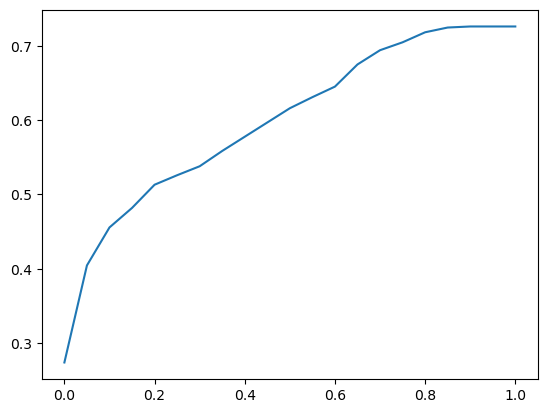

In [398]:
plt.plot(thresholds, scores_list)

In [400]:
from sklearn.metrics  import accuracy_score

In [402]:
accuracy_score(y_val, churn_decision)

0.7260468417317246

In [404]:
from collections import Counter

In [406]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [408]:
(y_val )

array([0, 0, 0, ..., 0, 1, 1])

### Confusion table

In [411]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [413]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [415]:
tp = ( predict_positive & actual_positive).sum()
tn = ( predict_negative & actual_negative).sum()

In [417]:
tp, tn

(84, 784)

In [419]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [421]:
fp, fn

(239, 302)

In [423]:
confusion_matrix = np.array(
    [
    [tn, fp],
    [fn, tp]
    ])

In [425]:
confusion_matrix

array([[784, 239],
       [302,  84]])

In [427]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.56, 0.17],
       [0.21, 0.06]])

### Precision & Recall

In [430]:
( tp + tn ) / (tp + tn + fp + fn )

0.6160397444996452

In [432]:
# Precision
p = tp /(tp + fp)
p

0.26006191950464397

In [434]:
tp + fp

323

In [436]:
84 / 323

0.26006191950464397

In [438]:
# Recall
r = tp /(tp + fn)
r

0.21761658031088082

### ROC Curves

#### FPR - False Positive Rate
#### TPR - True Positive  Rate

In [442]:
tpr = tp / (tp + fn)
tpr

0.21761658031088082

In [444]:
fpr = fp / (fp +tn)
fpr

0.23362658846529813

In [446]:
thresholds = np.linspace(0, 1, 101)

scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = ( predict_positive & actual_positive).sum()
    tn = ( predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append( (t, tp, tn, fp , fn))

#scores
 

In [448]:
columns = ['thresholds','tp', 'tn', 'fp' , 'fn']
df_scores= pd.DataFrame(scores, columns = columns)

In [450]:
df_scores

,thresholds,tp,tn,fp,fn
0,0.00,386,0,1023,0
1,0.01,368,69,954,18
2,0.02,336,141,882,50
3,0.03,326,195,828,60
4,0.04,311,249,774,75
...,...,...,...,...,...
96,0.96,0,1023,0,386
97,0.97,0,1023,0,386
98,0.98,0,1023,0,386
99,0.99,0,1023,0,386


In [452]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn) 
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [454]:
df_scores[::10]

,thresholds,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,248,394,629,138,0.642487,0.614858
20,0.2,185,538,485,201,0.479275,0.474096
30,0.3,141,617,406,245,0.365285,0.396872
40,0.4,107,707,316,279,0.277202,0.308895
50,0.5,84,784,239,302,0.217617,0.233627
60,0.6,55,854,169,331,0.142487,0.165200
70,0.7,23,955,68,363,0.059585,0.066471
80,0.8,1,1011,12,385,0.002591,0.011730
90,0.9,0,1023,0,386,0.000000,0.000000


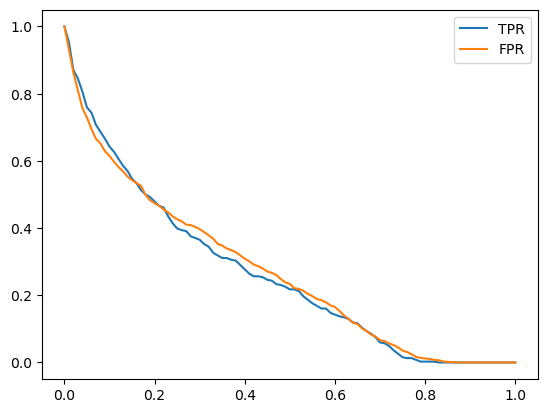

In [456]:
plt.plot(df_scores.thresholds, df_scores['tpr'], label = 'TPR') 
plt.plot(df_scores.thresholds, df_scores['fpr'], label = 'FPR')
plt.legend()

In [458]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size = len(y_val))

In [460]:
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [462]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [464]:
def trp_fpr_dataframe(y_val,y_pred):
    thresholds = np.linspace(0, 1, 101)

    scores = []

    for t in thresholds:
       actual_positive = (y_val == 1)
       actual_negative = (y_val == 0)
    
       predict_positive = (y_pred >= t)
       predict_negative = (y_pred < t)

       tp = ( predict_positive & actual_positive).sum()
       tn = ( predict_negative & actual_negative).sum()

       fp = (predict_positive & actual_negative).sum()
       fn = (predict_negative & actual_positive).sum()

       scores.append( (t, tp, tn, fp , fn))

       columns = ['thresholds','tp', 'tn', 'fp' , 'fn']
       df_scores= pd.DataFrame(scores, columns = columns)

       df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn) 
       df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    return df_scores


In [466]:
df_rand = trp_fpr_dataframe(y_val,y_rand)

In [468]:
df_rand[::10]

,thresholds,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,347,100,923,39,0.898964,0.902248
20,0.2,307,201,822,79,0.795337,0.803519
30,0.3,276,299,724,110,0.715026,0.707722
40,0.4,237,399,624,149,0.613990,0.609971
50,0.5,202,505,518,184,0.523316,0.506354
60,0.6,161,614,409,225,0.417098,0.399804
70,0.7,121,721,302,265,0.313472,0.295210
80,0.8,78,817,206,308,0.202073,0.201369
90,0.9,40,922,101,346,0.103627,0.098729


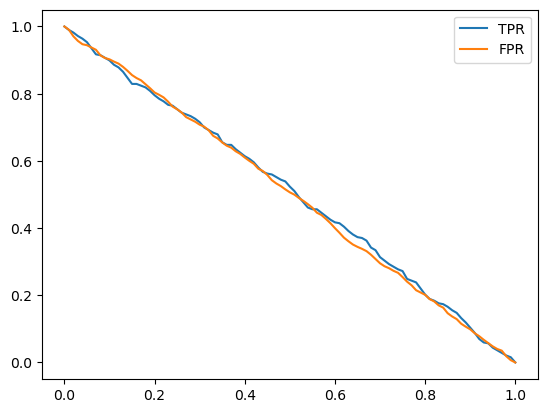

In [470]:
plt.plot(df_rand.thresholds, df_rand['tpr'], label = 'TPR') 
plt.plot(df_rand.thresholds, df_rand['fpr'], label = 'FPR')
plt.legend()

### Ideal Model

In [473]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [475]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [477]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [479]:
1 - y_val.mean()

0.7260468417317246

In [481]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [483]:
df_ideal = trp_fpr_dataframe(y_ideal,y_ideal_pred)
df_ideal[::10]

,thresholds,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,386,141,882,0,1.000000,0.862170
20,0.2,386,282,741,0,1.000000,0.724340
30,0.3,386,423,600,0,1.000000,0.586510
40,0.4,386,564,459,0,1.000000,0.448680
50,0.5,386,704,319,0,1.000000,0.311828
60,0.6,386,845,178,0,1.000000,0.173998
70,0.7,386,986,37,0,1.000000,0.036168
80,0.8,282,1023,0,104,0.730570,0.000000
90,0.9,141,1023,0,245,0.365285,0.000000


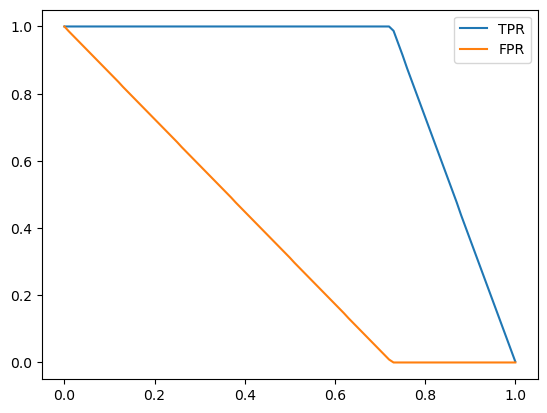

In [485]:
plt.plot(df_ideal.thresholds, df_ideal['tpr'], label = 'TPR') 
plt.plot(df_ideal.thresholds, df_ideal['fpr'], label = 'FPR')
plt.legend()

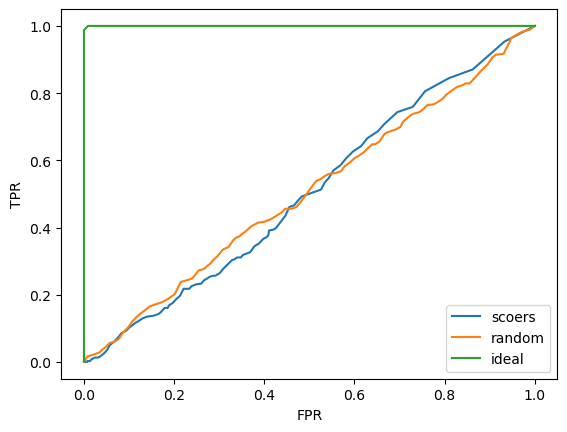

In [487]:
plt.plot(df_scores.fpr, df_scores.tpr, label = 'scoers') 
plt.plot(df_rand.fpr, df_rand.tpr, label = 'random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'ideal')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

####### using scikit learn

In [490]:
from sklearn.metrics import roc_curve


In [492]:
fpr, tpr, threshold = roc_curve(y_val, y_pred)

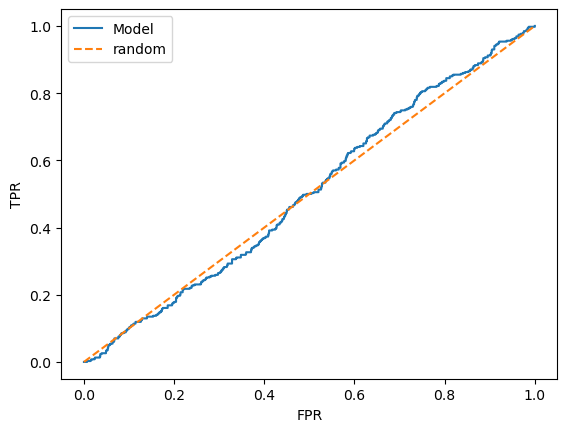

In [494]:
plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1],[0, 1], label='random', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

#### ROC AUC

In [497]:
from sklearn.metrics import auc

In [499]:
auc(fpr, tpr)

0.5040582154488222

In [501]:
auc(df_scores.fpr,df_scores.tpr)

0.5037593889758356

In [503]:
from sklearn.metrics import roc_auc_score

In [505]:
roc_auc_score(y_val, y_pred)

0.5040582154488222

In [507]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [509]:
import random

In [511]:
n = 10000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) -1)

    if pos[pos_ind] > neg[neg_ind]:
        success += 1

success / n

0.5026

In [513]:
n = 10000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size= n)
neg_ind = np.random.randint(0, len(neg), size= n)
(pos[pos_ind] > neg[neg_ind]).mean()

0.5076

#### Cross - Validation

In [555]:
def train(df_train, y_train, C= 1.0):
    dicts = df_train[categorical + numerical].to_dict(orient = 'records')

    dv = DictVectorizer(sparse= False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C= C)
    model.fit(X_train, y_train)

    return dv,model

In [557]:
dv, model = train(df_train, y_train, C= 0.001)

In [561]:
print(dv, model)

DictVectorizer(sparse=False) LogisticRegression(C=0.001)


In [620]:
'''
def predict(df, dv, model):
    #df_train = df_train.drop('churn', axis=1)
    dicts = df_train[categorical + numerical].to_dict(orient = 'records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[: , 1]
    return y_pred
    '''

"\ndef predict(df, dv, model):\n    #df_train = df_train.drop('churn', axis=1)\n    dicts = df_train[categorical + numerical].to_dict(orient = 'records')\n\n    X = dv.transform(dicts)\n    y_pred = model.predict_proba(X)[: , 1]\n    return y_pred\n    "

In [622]:
def predict(df, dv, model):
    X = dv.transform(df.to_dict(orient='records'))
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [624]:
y_pred = predict(df_val, dv, model)

In [626]:
from sklearn.model_selection import KFold

In [628]:
kfold = KFold(n_splits=10, shuffle= True, random_state= 1)

In [630]:
train_idx, val_idx = next(kfold.split(data_full_train))

In [632]:
len(train_idx), len(val_idx)

(5070, 564)

In [634]:
5070 + 564

5634

In [636]:
len(data_full_train)

5634

In [638]:
df_train = data_full_train.iloc[train_idx]
df_val = data_full_train.iloc[val_idx]

In [640]:
from tqdm.auto import tqdm

In [642]:
from sklearn.model_selection import KFold

In [644]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train ,df_full_train.churn):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.824 +- 0.009
C=0.01 0.838 +- 0.008
C=0.1 0.840 +- 0.007
C=0.5 0.840 +- 0.007
C=1 0.840 +- 0.007
C=5 0.840 +- 0.007
C=10 0.840 +- 0.007


In [646]:
scores

[0.8429206144861097,
 0.8428871176003176,
 0.8312261689745133,
 0.8328104016115624,
 0.848275077656804]

In [648]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8565994453291732

### Summery:

##### Purpose of this project to apply the logistic Regression for the classification using ML fundamentalas.

#### Applied the different evaluation tenique to project to concore my skill and knowledge.